In [134]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.datasets
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [135]:
dataset = sk.datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

In [136]:
#Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [137]:
N_train = X_train.shape[0]
N_val = X_train.shape[0]
d = X_train.shape[1]

In [138]:
#Normalize Data
X_train = (X_train - np.mean(X_train,axis=0)) / np.std(X_train,axis=0)
X_test = (X_test - np.mean(X_train,axis=0)) / np.std(X_train,axis=0)

In [139]:
X_train = np.insert(X_train,0,1,axis=1)
X_test = np.insert(X_test,0,1,axis=1)

In [140]:
def sigmoid(u):
    exp_u = np.exp(u)
    return exp_u/(1+exp_u)

In [141]:
def binary_cross_entropy(p,q):
    return -p*np.log(q) - (1-p)*np.log(1-q)

In [142]:
def L(beta,X,y):
    N = X.shape[0]
    s = 0
    for i in range(N):
        xiHat = X[i]
        yi = y[i]
        
        yi_pred = sigmoid(np.vdot(xiHat,beta))
        
        s = s + binary_cross_entropy(yi,yi_pred)
        
    return s / N 

In [143]:
def grad_L(beta,X,y):
    N = X.shape[0]
    grad = 0
    for i in range(N):
        xiHat = X[i]
        yi = y[i]
        
        yi_pred = sigmoid(np.vdot(xiHat,beta))
        
        grad = grad + (sigmoid(np.vdot(xiHat,beta)) - yi)*xiHat.T
        
    return grad / N 

In [144]:
def LogReg_GradientDescent(X,y):
    num_iters = 100
    alpha = 0.001
    beta = np.zeros(d+1)
    
    L_vals = np.zeros(num_iters)
    for t in range(num_iters):
        L_vals[t] = L(beta,X,y)
        
        if t % 20:
            print(L_vals[t])
            
        beta = beta - alpha * grad_L(beta,X,y)
    
    return beta, L_vals

In [151]:
def make_predictions(beta,X):
    N = X.shape[0]
    y_pred = np.zeros(N)
    
    for i in range(N):
        xiHat = X[i]
        yi_pred = sigmoid(np.vdot(xiHat,beta))
        y_pred[i] = yi_pred
        
    return np.round(y_pred)

In [146]:
beta, L_vals = LogReg_GradientDescent(X_train,y_train)

0.6911826001661029
0.6892304554984362
0.687290664772721
0.6853631462216476
0.6834478181108006
0.6815445987543877
0.6796534065306932
0.6777741598972548
0.6759067774057544
0.6740511777166172
0.6722072796133305
0.6703750020164442
0.6685542639972891
0.6667449847913761
0.6649470838114915
0.6631604806604867
0.6613850951437455
0.6596208472813448
0.6578676573198936
0.6543941332877695
0.6526736409451103
0.6509638899808844
0.6492648019408779
0.6475762986617883
0.6458983022808518
0.6442307352451442
0.6425735203205895
0.6409265806006305
0.6392898395146184
0.6376632208358761
0.6360466486894741
0.6344400475596941
0.6328433422972074
0.6312564581259477
0.6296793206497057
0.6281118558584285
0.626553990134248
0.6250056502572112
0.621937257186936
0.6204170595912906
0.6189060990475834
0.6174043044021885
0.6159116049282594
0.6144279303296497
0.6129532107445939
0.6114873767491432
0.6100303593603738
0.6085820900393696
0.6071425006939858
0.6057115236813831
0.6042890918103649
0.6028751383434983
0.6014695969990

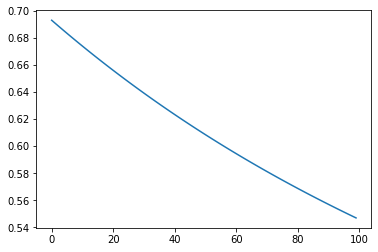

In [147]:
plt.plot(L_vals)

In [152]:
y_pred = make_predictions(beta,X_test)

NameError: name 'softmax' is not defined

In [149]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [150]:
y_test

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1])